In [1]:
from vnpy_ctastrategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy_ctastrategy.strategies.atr_rsi_strategy import AtrRsiStrategy
from vnpy_ctastrategy.strategies.boll_channel_strategy import BollChannelStrategy
from datetime import datetime

In [2]:
def run_backtesting(strategy_class, setting, vt_symbol, interval, start, end, rate, slippage, size, pricetick, capital):
    engine = BacktestingEngine()
    engine.set_parameters(
        vt_symbol=vt_symbol,
        interval=interval,
        start=start,
        end=end,
        rate=rate,
        slippage=slippage,
        size=size,
        pricetick=pricetick,
        capital=capital    
    )
    engine.add_strategy(strategy_class, setting)
    engine.load_data()
    engine.run_backtesting()
    df = engine.calculate_result()
    return df

def show_portafolio(df):
    engine = BacktestingEngine()
    engine.calculate_statistics(df)
    engine.show_chart(df)

In [3]:
df1 = run_backtesting(
    strategy_class=AtrRsiStrategy, 
    setting={}, 
    vt_symbol="IF88.CFFEX",
    interval="1m", 
    start=datetime(2019, 1, 1), 
    end=datetime(2019, 4, 30),
    rate=0.3/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
    )

2019-06-10 23:37:47.321851	开始加载历史数据
2019-06-10 23:37:47.736877	加载进度：## [25%]
2019-06-10 23:37:47.990762	加载进度：##### [50%]
2019-06-10 23:37:48.298379	加载进度：####### [76%]
2019-06-10 23:37:48.518127	加载进度：########## [100%]
2019-06-10 23:37:48.518127	历史数据加载完成，数据量：17280
2019-06-10 23:37:48.584513	策略初始化完成
2019-06-10 23:37:48.584513	开始回放历史数据
2019-06-10 23:37:49.319839	历史数据回放结束
2019-06-10 23:37:49.319839	开始计算逐日盯市盈亏
2019-06-10 23:37:49.324736	逐日盯市盈亏计算完成


In [4]:
df2 = run_backtesting(
    strategy_class=BollChannelStrategy, 
    setting={'fixed_size': 16}, 
    vt_symbol="RB88.SHFE",
    interval="1m", 
    start=datetime(2019, 1, 1), 
    end=datetime(2019, 4, 30),
    rate=1/10000,
    slippage=1,
    size=10,
    pricetick=1,
    capital=1_000_000,
    )

2019-06-10 23:37:54.953582	开始加载历史数据
2019-06-10 23:37:55.452611	加载进度：## [25%]
2019-06-10 23:37:55.905706	加载进度：##### [50%]
2019-06-10 23:37:56.352015	加载进度：####### [76%]
2019-06-10 23:37:56.885187	加载进度：########## [100%]
2019-06-10 23:37:56.885187	历史数据加载完成，数据量：27168
2019-06-10 23:37:56.903729	策略初始化完成
2019-06-10 23:37:56.903729	开始回放历史数据
2019-06-10 23:37:57.144939	历史数据回放结束
2019-06-10 23:37:57.144939	开始计算逐日盯市盈亏
2019-06-10 23:37:57.150828	逐日盯市盈亏计算完成


2019-06-10 23:38:00.683004	开始计算策略统计指标
2019-06-10 23:38:00.799241	------------------------------
2019-06-10 23:38:00.799241	首个交易日：	2019-01-16
2019-06-10 23:38:00.799241	最后交易日：	2019-04-19
2019-06-10 23:38:00.799241	总交易日：	62
2019-06-10 23:38:00.799241	盈利交易日：	31
2019-06-10 23:38:00.799241	亏损交易日：	31
2019-06-10 23:38:00.799241	起始资金：	1,000,000.00
2019-06-10 23:38:00.799241	结束资金：	1,094,312.31
2019-06-10 23:38:00.799241	总收益率：	9.43%
2019-06-10 23:38:00.799241	年化收益：	36.51%
2019-06-10 23:38:00.799241	最大回撤: 	-119,944.93
2019-06-10 23:38:00.799241	百分比最大回撤: -10.84%
2019-06-10 23:38:00.799241	总盈亏：	94,312.31
2019-06-10 23:38:00.799241	总手续费：	11,787.69
2019-06-10 23:38:00.799241	总滑点：	23,500.00
2019-06-10 23:38:00.799241	总成交金额：	333,377,980.00
2019-06-10 23:38:00.799241	总成交笔数：	320.0
2019-06-10 23:38:00.799241	日均盈亏：	1,521.17
2019-06-10 23:38:00.799241	日均手续费：	190.12
2019-06-10 23:38:00.799241	日均滑点：	379.03
2019-06-10 23:38:00.799241	日均成交金额：	5,377,064.19
2019-06-10 23:38:00.799241	日均成交笔数：	5.161290322580645
201

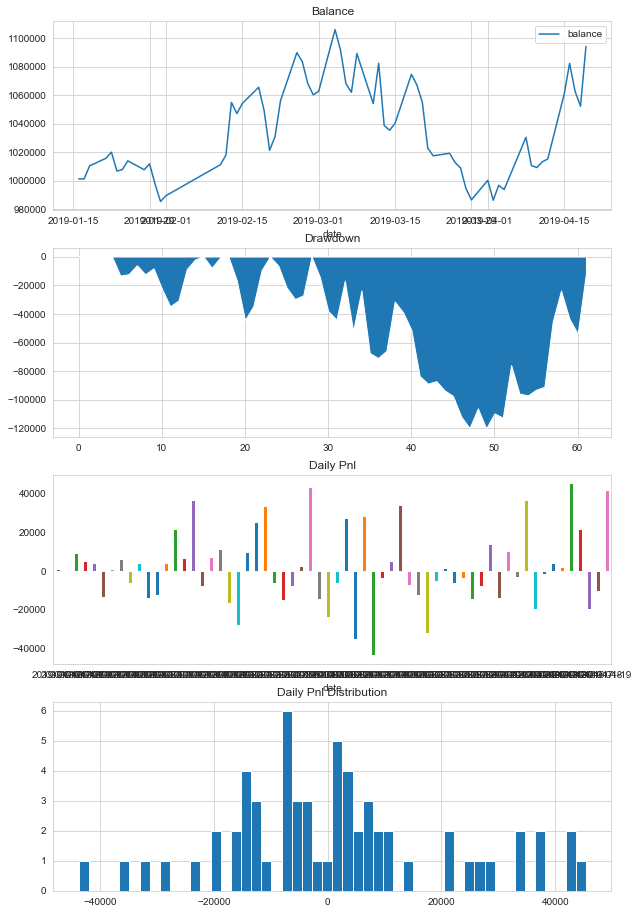

In [5]:
dfp = df1 + df2
dfp =dfp.dropna() 
show_portafolio(dfp)